In [3]:
import os
print (os.environ['CONDA_DEFAULT_ENV'], os.environ['CONDA_PREFIX'])
#%conda info
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

base /Users/vbloise/miniconda3
/Users/vbloise/miniconda3/envs/py39/bin/python
3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:27:05) 
[Clang 12.0.1 ]
sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)


In [3]:
!pip list

Package                              Version
------------------------------------ -------------------
absl-py                              1.0.0
appnope                              0.1.3
argon2-cffi                          21.3.0
argon2-cffi-bindings                 21.2.0
astroid                              2.11.2
asttokens                            2.0.5
astunparse                           1.6.3
attrs                                21.4.0
backcall                             0.2.0
beautifulsoup4                       4.11.1
bleach                               5.0.0
cachetools                           5.0.0
certifi                              2021.10.8
cffi                                 1.15.0
charset-normalizer                   2.0.12
colorama                             0.4.4
concorde                             0.1.2
cycler                               0.11.0
Cython                               0.29.28
debugpy                              1.6.0
decorator               

In [4]:
from tsplib import readerTSP, plotterTSP
import networkx as nx

reader = readerTSP.ReaderTSP()
plotter = plotterTSP.PlotterTSP(None)

iterator = iter(reader.instances_generator())
next(iterator); next(iterator); next(iterator)
instance = next(iterator)
n_points, positions, distance_matrix, name, optimal_tour = instance
print(name)

ch130


In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import numpy as np

options = {'node_size':8}
pos = positions

def add_optimal_edges(g, opt_tour):
    prev = None
    first = None
    edges = []
    for node in opt_tour:
        if prev is None:
            first = prev = node
            continue
        edge_tpl = (prev, node)
        g.add_edge(*edge_tpl)
        edges.append(edge_tpl)
        prev = node
    g.add_edge(first, prev)
    edges.append((first, prev))
    return edges

def add_minimum_spanning_tree(g, dist_matrix):
    X = np.triu(dist_matrix,0)
    Tcsr = minimum_spanning_tree(csr_matrix(X))

    G_mst = g.copy()
    edges = []
    for edge in np.argwhere(Tcsr>0):
        edge_tpl = (edge[0], edge[1])
        G_mst.add_edge(*edge_tpl)
        edges.append(edge_tpl)

    options['edge_color']='lightgray'
    nx.draw(G_mst, pos, **options)
    return edges

def add_shortest_edges(g, dist_matrix):
    size = distance_matrix.shape[0]

    G_min = g.copy()
    for edge in np.argsort(dist_matrix, axis=None)[size:size*3]:
        #print(edge, edge % size, edge // size)
        G_min.add_edge(edge % size, edge // size)

    options['edge_color']='red'
    nx.draw(G_min, pos, **options)
    
def add_local_shortest_edges(g, dist_matrix):
    j = 0
    G_min2 = g.copy()
    edges = []
    for i in np.argsort(dist_matrix, axis=1):
        edge_tpl = (j, i[1])
        G_min2.add_edge(*edge_tpl)
        edges.append(edge_tpl)
        
        #G_min2.add_edge(j, i[2])
        j += 1
        
    options['edge_color']='red'
    nx.draw(G_min2, pos, **options)
    return edges

In [ ]:
plotter.set_figure(1)
plotter.plot_points(positions)

In [ ]:
G = nx.Graph()
edges_mst = add_minimum_spanning_tree(G, distance_matrix)

#filterX = X[X > 0]

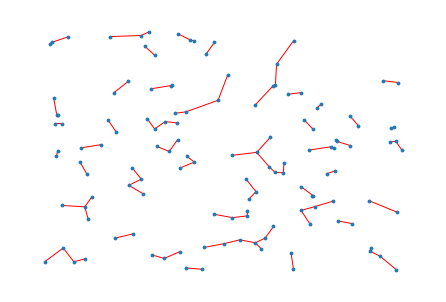

In [15]:
edges_lmin = add_local_shortest_edges(G, distance_matrix)

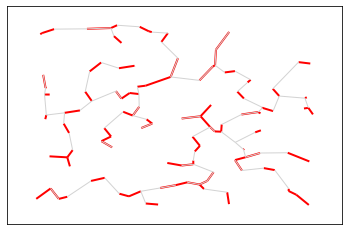

In [16]:
#print(edges_mst)
#print(edges_lmin)
#np.intersect1d(edges_mst, edges_lmin)

rev_edges_lmin = [(e[1], e[0]) for e in edges_lmin]
intersect_edges = set(edges_mst).intersection(set(edges_lmin).union(rev_edges_lmin))
diff_edges = set(edges_mst) - set(edges_lmin)
#print(len(intersect_edges))
#print(len((diff_edges).union(set(edges_lmin) - set(edges_mst))))
#add_shortest_edges(G, distance_matrix)

G_nsct = G.copy()
options = {'node_size':8}
nx.draw_networkx_nodes(G_nsct, pos, node_size=8)
for edge in intersect_edges:
    G_nsct.add_edge(edge[0], edge[1], color='red')
nx.draw_networkx_edges(G_nsct, pos, edgelist=intersect_edges, edge_color='red', width=2)
    
for edge in diff_edges:
    G_nsct.add_edge(edge[0], edge[1], color='gray')
nx.draw_networkx_edges(G_nsct, pos, edgelist=diff_edges, edge_color='lightgray')



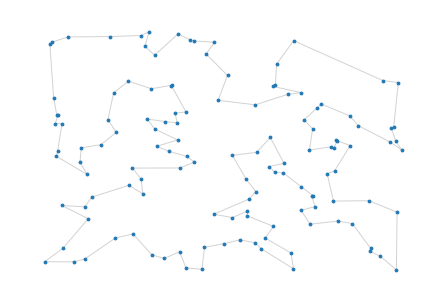

In [17]:
G_opt = G.copy()
opt_edges = add_optimal_edges(G_opt, optimal_tour)
options['edge_color']='lightgray'
nx.draw(G_opt, pos, **options)


In [18]:
rev_opt_edges = [(e[1], e[0]) for e in opt_edges]
error_edges = set(intersect_edges) - set(opt_edges) - set(rev_opt_edges)
print(len(opt_edges), len(intersect_edges), len(error_edges))


130 85 15


In [19]:
print(set(error_edges))
print('\n', set(opt_edges))

{(34, 117), (26, 99), (113, 125), (22, 46), (25, 96), (68, 87), (14, 23), (19, 45), (66, 95), (80, 86), (103, 106), (104, 111), (38, 40), (57, 105), (37, 78)}

 {(60, 108), (115, 23), (26, 30), (42, 103), (27, 114), (47, 62), (82, 29), (107, 113), (18, 26), (102, 80), (108, 75), (61, 27), (73, 74), (34, 3), (88, 93), (53, 34), (125, 20), (109, 88), (51, 64), (28, 14), (75, 10), (114, 111), (64, 55), (116, 38), (62, 67), (16, 33), (76, 102), (17, 7), (85, 68), (39, 46), (22, 39), (14, 99), (44, 15), (118, 83), (127, 104), (110, 118), (55, 8), (33, 42), (81, 100), (122, 110), (3, 19), (68, 63), (101, 5), (98, 73), (84, 65), (59, 54), (21, 36), (66, 13), (67, 97), (104, 61), (103, 126), (90, 71), (119, 52), (89, 124), (9, 101), (43, 41), (8, 56), (91, 72), (1, 53), (113, 2), (13, 9), (69, 96), (70, 40), (105, 37), (112, 24), (129, 49), (86, 78), (20, 32), (23, 28), (58, 89), (15, 127), (111, 116), (74, 51), (78, 94), (7, 107), (93, 76), (29, 58), (11, 86), (54, 121), (38, 70), (95, 12), (

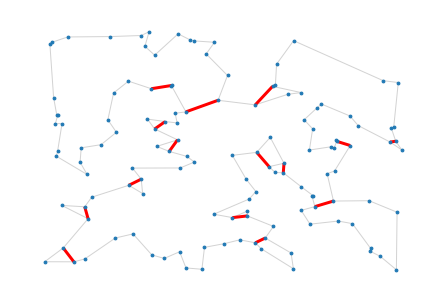

In [20]:
nx.draw(G_opt, pos, **options)
nx.draw_networkx_edges(G_opt, pos, edgelist=error_edges, edge_color='red', width=3)